# Milestone 4

## Oscilador lineal
En este *milestone* se integra el oscilador lineal $\ddot{x}+x=0$ con los esquemas temporales de los *milestones* anteriores y se añade el método Leap-Frog. Dichos métodos se encuentran en el archivo `temporal_schemes_v2.py`. La ecuación diferencial del oscilador lineal se encuentra en `differential_equation_v2.py`.   

In [3]:
from numpy import sqrt, real, imag, array, linspace
from numpy.random import uniform
from numpy import meshgrid
import matplotlib.pyplot as plt
from temporal_schemes_v2 import Cauchy_problem, Euler, Crank_Nicolson, RK4, Inverse_Euler, leapfrog
from differential_equation_v2 import linear_oscillator

In [97]:
U0_list = [array([1,0]), array([0,1]), array([1,1]), array([2,0]), array([1, 3])]
T = 10
N = 1000
t = linspace(0, T, N)
tol_jacobian = 1e-9
N_max = 10000
newton_tol = 1e-10


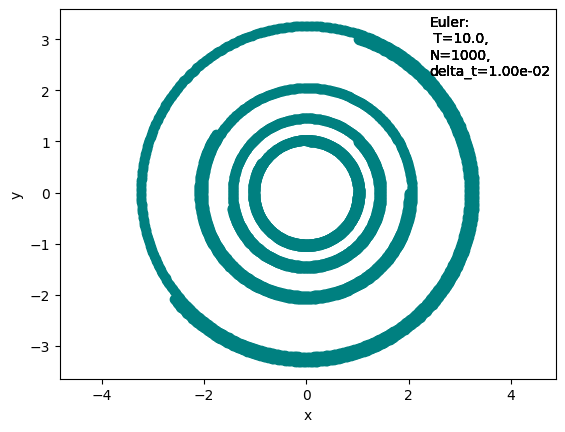

In [98]:
def plot_orbits(problem, U0_list, t, time_scheme, **kwargs):
    """
    Plots orbits with multiple initial conditions on a single plot.
    problem: The cauchy problem to solve.
    U0_list: List of initial conditions
    t: Time values for the integration (array).
    time_scheme: Time scheme for integration.
    """
    for U0 in U0_list:
        U = Cauchy_problem(problem, U0, t, time_scheme, **kwargs)
        #plt.scatter(U[:, 0], U[:, 1], color='teal', s=1, label="Time steps")
        plt.plot(U[:,0], U[:,1], marker="o", color='teal')
        plt.text(x=2.4, y=2.3, s=f"{time_scheme.__name__}:\n T={t[-1]},\nN={len(t)},\ndelta_t={T/N:.2e}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")
    plt.show()
    return

plot_orbits(linear_oscillator, U0_list, t, Euler)

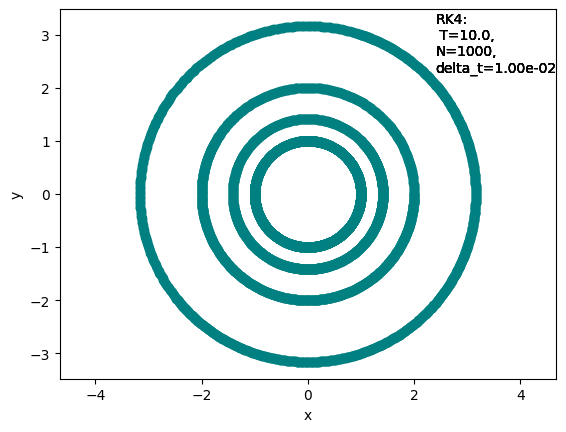

In [99]:
plot_orbits(linear_oscillator, U0_list, t, RK4)

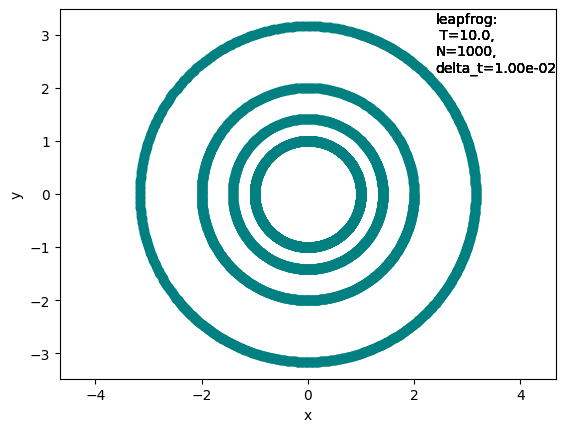

In [100]:
plot_orbits(linear_oscillator, U0_list, t, leapfrog)

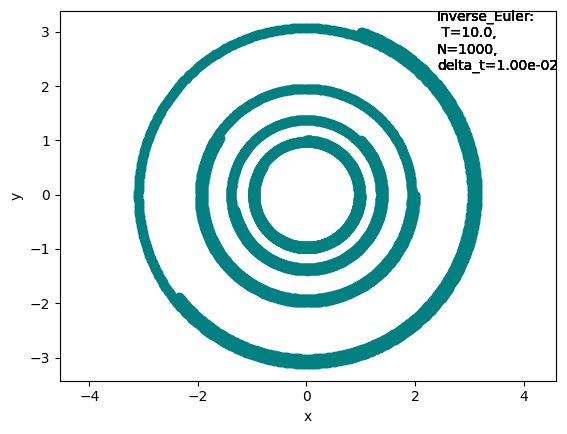

In [101]:
plot_orbits(linear_oscillator, U0_list, t, Inverse_Euler, tol_jacobian=tol_jacobian, newton_tol=newton_tol, N_max=N_max)

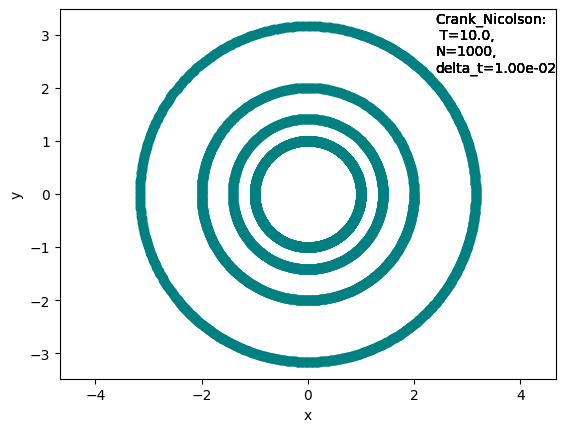

In [102]:
plot_orbits(linear_oscillator, U0_list, t,  Crank_Nicolson, tol_jacobian=tol_jacobian, newton_tol=newton_tol, N_max=N_max)

## Regiones de estabilidad absoluta

Dado un método numérico con polinomio característico $\pi(\omega, r)$, con $r,\omega \in \mathbb{C}$, $\omega=\lambda \Delta t$, con $\lambda\in \mathbb{C}$, se define su región de estabilidad absoluta como las raíces de $\pi$ tales que $|r|<1$. A continuación se calculan y se muestran las regiones de estabilidad absoluta de los esquemas temporales usados a lo largo del curso.

Recordando que los valores propios del oscilador lineal son $\lambda=\pm i$, por lo que se encuentran dentro de las regiones de estabilidad absoluta de leapfrog, RK4 y Euler inverso, pero no para Euler y Crank-Nicolson, lo que justifica que requieran una cantidad mayor de pasos para alcanzar precisiones similares a los demás métodos.

In [95]:
def stability_region(temporal_scheme):
    """
    Finds and plots the region of absolute stability of a given temporal scheme.
    r: U^(n+1)
    omega: delta_t
    Inputs:
    temporal_scheme: the temporal scheme.
    """
    if temporal_scheme == Euler:
        def r(omega):
            return 1+omega
    elif temporal_scheme == Crank_Nicolson:
        def r(omega):
            return (1+0.5*omega)/(1-0.5*omega)
    elif temporal_scheme == Inverse_Euler:
        def r(omega):
           return  1/(1-omega)
    elif temporal_scheme == RK4:
        def r(omega):
            return 1+omega+0.5*omega**2+(1/6)*omega**3+(1/24)*omega**4
    elif temporal_scheme == leapfrog:
        def r_one(omega):
            #https://www.sciencedirect.com/science/article/pii/S0096300308008758
            
            return omega + sqrt(omega**2 + 1)
        def r_two(omega):
            #https://www.sciencedirect.com/science/article/pii/S0096300308008758
            
            return omega - sqrt(omega**2 + 1)    
    else:
        print("ERROR: Numerical method not available")
        return
    N = 2000
    real_part = uniform(-5, 5, N)
    imag_part = uniform(-5, 5, N)
    if temporal_scheme == leapfrog:
        real_part = 0
        imag_part = uniform(-5, 5, N)
    Re, Im = meshgrid(real_part, imag_part)
    omega = Re + 1j*Im
    if temporal_scheme != leapfrog:
        plt.scatter(real(omega[abs(r(omega))<1]), imag(omega[abs(r(omega))<1]), s=1)
        
    else:
        mask = (abs(r_one(omega)) < 1) & (abs(r_two(omega)) < 1)
        plt.scatter(real(omega[mask]), imag(omega[mask]), s=1)

    
    plt.axis("equal")
    plt.axhline(0, color='black', linewidth=1)  # horizontal axis (y=0)
    plt.axvline(0, color='black', linewidth=1)  # vertical axis (x=0)
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.xlabel(r"Re($\omega$)")
    plt.ylabel(r"Im($\omega$)")
    plt.show()


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


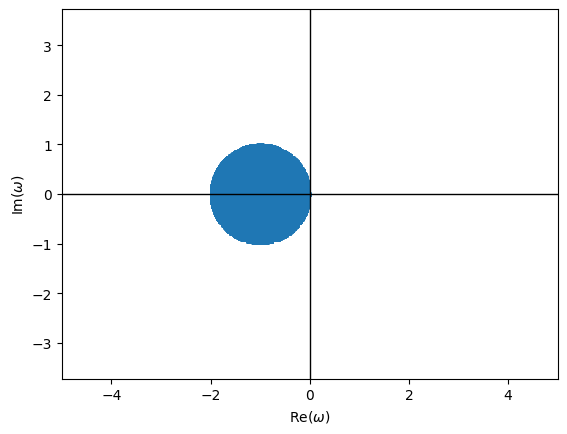

In [87]:
stability_region(Euler)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


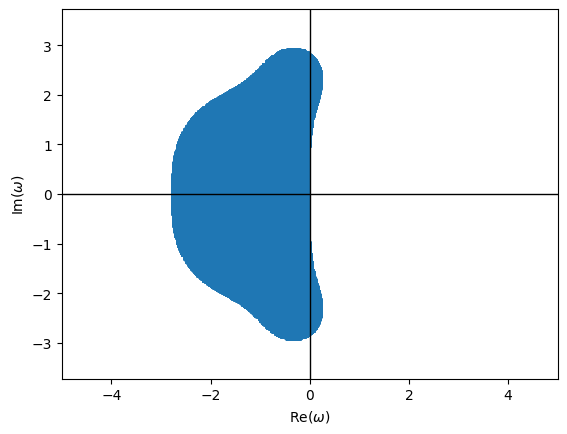

In [88]:
stability_region(RK4)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


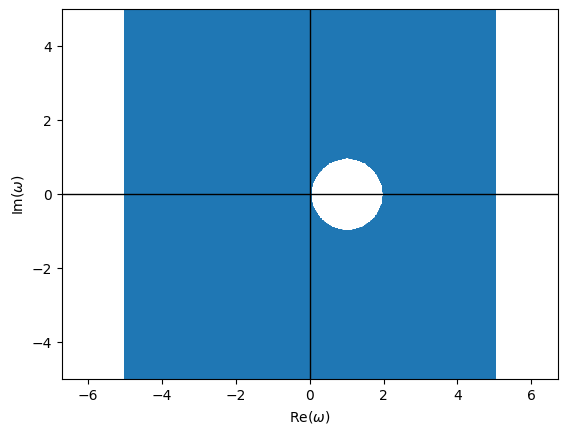

In [89]:
stability_region(Inverse_Euler)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


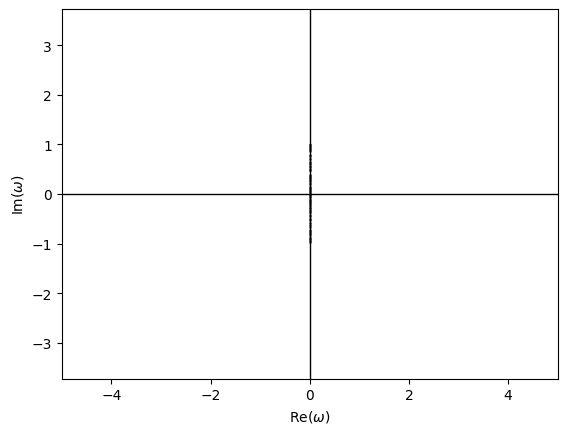

In [96]:
stability_region(leapfrog)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


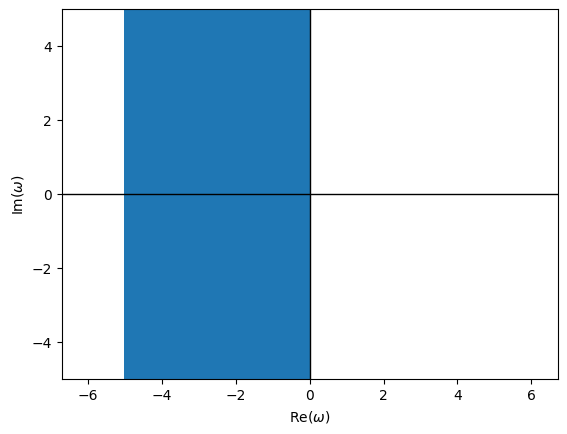

In [91]:
stability_region(Crank_Nicolson)